### **Semana 2**

Este notebook ilustra distintas acciones expuestas en el notebook de la semana. Como notarás, no están directamente relacionadas a la predicción de churn, pues la idea es que ustedes sepan adaptar e implementar el código en el marco del desafío semanal.

**Método de selección basado en modelos**

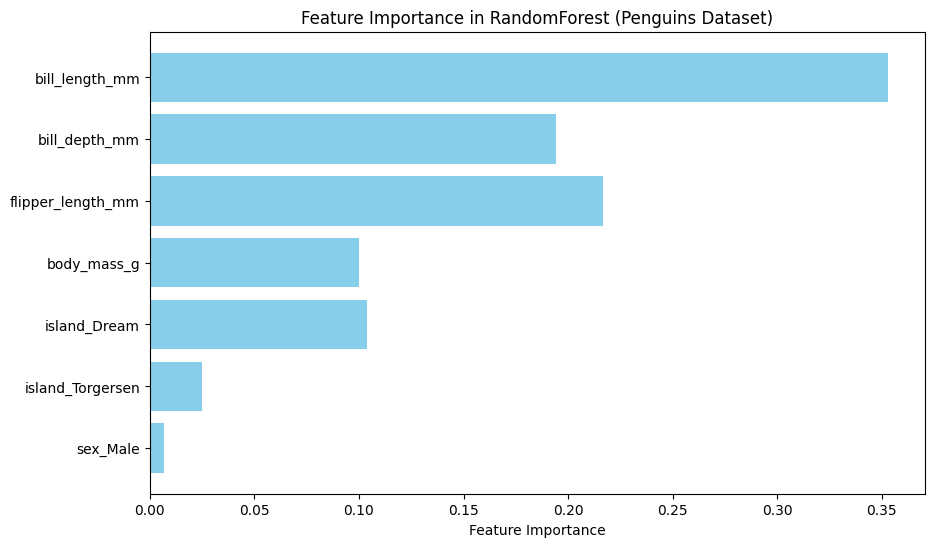

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# 🔹 Load the Penguins dataset
penguins = sns.load_dataset("penguins")

# 🔹 Drop missing values
penguins.dropna(inplace=True)

# 🔹 Separate features and target variable
X = penguins.drop(columns=["species"])  # Features
y = penguins["species"]  # Target (multiclass classification)

# 🔹 Identify categorical and numerical variables
X_categoricals = X.select_dtypes(include=["object"])
X_numericals = X.select_dtypes(exclude=["object"])

# 🔹 Encode categorical variables using OneHotEncoder
encoder = OneHotEncoder(drop="first", sparse_output=False)
X_encoded = encoder.fit_transform(X_categoricals)

# 🔹 Normalize numerical variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numericals)

# 🔹 Combine encoded categorical and scaled numerical features
X_final = np.hstack((X_scaled, X_encoded))

# 🔹 Get feature names (numerical + categorical)
feature_names = np.hstack((X_numericals.columns, encoder.get_feature_names_out()))

# 🔹 Train RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_final, y)

# 🔹 Get feature importance
importance = model.feature_importances_

# 🔹 Visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(importance)), importance, color="skyblue")
plt.yticks(range(len(feature_names)), feature_names)
plt.xlabel("Feature Importance")
plt.title("Feature Importance in RandomForest (Penguins Dataset)")
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()


**Método de Selección basado en Matriz de Correlación**

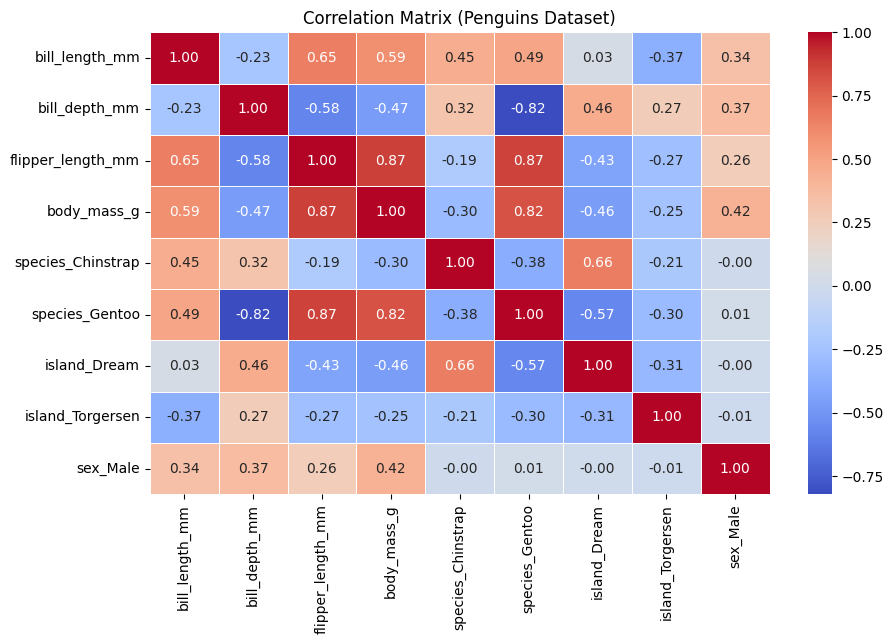

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# 🔹 Load the Penguins dataset
penguins = sns.load_dataset("penguins")

# 🔹 Drop missing values
penguins.dropna(inplace=True)

# 🔹 Separate categorical and numerical variables
X_categoricals = penguins.select_dtypes(include=["object"])
X_numericals = penguins.select_dtypes(exclude=["object"])

# 🔹 Encode categorical variables using OneHotEncoder
encoder = OneHotEncoder(drop="first", sparse_output=False)
X_encoded = encoder.fit_transform(X_categoricals)

# 🔹 Normalize numerical variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numericals)

# 🔹 Combine encoded categorical and scaled numerical features
X_final = np.hstack((X_scaled, X_encoded))

# 🔹 Create a DataFrame with proper column names
feature_names = np.hstack((X_numericals.columns, encoder.get_feature_names_out()))
df = pd.DataFrame(X_final, columns=feature_names)

# 🔹 Compute the correlation matrix
correlation_matrix = df.corr()

# 🔹 Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix (Penguins Dataset)')
plt.show()


**Método de Selección basado e selección automática mediante técnicas de búsqueda**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score

# 🔹 Cargar el dataset Penguins
penguins = sns.load_dataset("penguins")

# 🔹 Eliminar filas con valores nulos
penguins.dropna(inplace=True)

# 🔹 Separar variables predictoras y objetivo
X = penguins.drop(columns=["species"])  # Variables predictoras
y = penguins["species"]  # Variable objetivo (multiclase)

# 🔹 Identificar variables categóricas y numéricas
X_categoricas = X.select_dtypes(include=["object"])
X_numericas = X.select_dtypes(exclude=["object"])

# 🔹 Codificar variables categóricas con OneHotEncoder (corregido)
encoder = OneHotEncoder(drop="first", sparse_output=False)  # Cambio de sparse=False a sparse_output=False
X_encoded = encoder.fit_transform(X_categoricas)

# 🔹 Normalizar las variables numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numericas)

# 🔹 Concatenar variables numéricas y categóricas transformadas
X_final = np.hstack((X_scaled, X_encoded))

# 🔹 Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42, stratify=y)

# 🔹 Modelo de selección de características con RandomForest
selector_model = RandomForestClassifier(n_estimators=100, random_state=42)
selector_model.fit(X_train, y_train)

# 🔹 Selección de características basada en importancia
selector = SelectFromModel(selector_model, threshold="mean", prefit=True)
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# 🔹 Entrenar un nuevo modelo con las características seleccionadas
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_selected, y_train)

# 🔹 Evaluar el modelo
y_pred = model.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)

print(f"Precisión del modelo tras selección de características: {accuracy:.2f}")

# 🔹 Ver importancia de las características
feature_names = np.hstack((X_numericas.columns, encoder.get_feature_names_out()))
feature_importances = pd.DataFrame({
    "Característica": feature_names,
    "Importancia": selector_model.feature_importances_
}).sort_values(by="Importancia", ascending=False)

print(feature_importances)


Precisión del modelo tras selección de características: 0.97
      Característica  Importancia
0     bill_length_mm     0.346661
2  flipper_length_mm     0.218088
1      bill_depth_mm     0.194945
3        body_mass_g     0.106277
4       island_Dream     0.104428
5   island_Torgersen     0.023510
6           sex_Male     0.006092


**Undersampling and oversampling**

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64


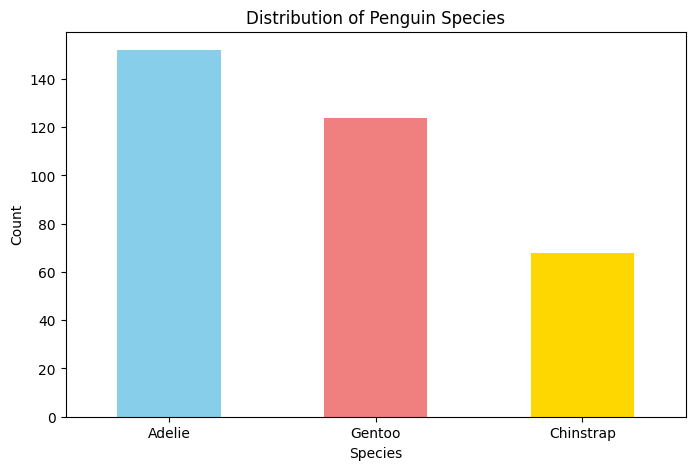

In [6]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# 🔹 Cargar el dataset Penguins
penguins = sns.load_dataset("penguins")

# 🔹 Contar las clases únicas en la variable "species"
species_counts = penguins["species"].value_counts()

# 🔹 Mostrar los conteos
print(species_counts)

# 🔹 Visualizar la distribución de clases
plt.figure(figsize=(8, 5))
species_counts.plot(kind="bar", color=["skyblue", "lightcoral", "gold"])
plt.xlabel("Species")
plt.ylabel("Count")
plt.title("Distribution of Penguin Species")
plt.xticks(rotation=0)
plt.show()


Original class distribution:
species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64

Balanced class distribution:
Counter({'Adelie': 146, 'Chinstrap': 146, 'Gentoo': 146})


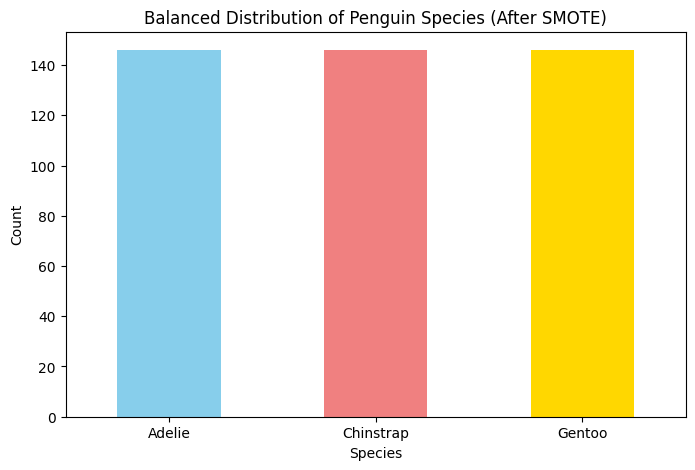

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from collections import Counter

# 🔹 Load the Penguins dataset
penguins = sns.load_dataset("penguins")

# 🔹 Drop missing values
penguins.dropna(inplace=True)

# 🔹 Check initial class distribution
print("Original class distribution:")
print(penguins["species"].value_counts())

# 🔹 Separate features and target variable
X = penguins.drop(columns=["species"])
y = penguins["species"]

# 🔹 Identify categorical and numerical variables
X_categoricals = X.select_dtypes(include=["object"])
X_numericals = X.select_dtypes(exclude=["object"])

# 🔹 Encode categorical variables using OneHotEncoder
encoder = OneHotEncoder(drop="first", sparse_output=False)
X_encoded = encoder.fit_transform(X_categoricals)

# 🔹 Normalize numerical variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numericals)

# 🔹 Combine encoded categorical and scaled numerical features
X_final = np.hstack((X_scaled, X_encoded))

# 🔹 Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_final, y)

# 🔹 Check the new balanced class distribution
print("\nBalanced class distribution:")
print(Counter(y_resampled))

# 🔹 Visualize the new class distribution
plt.figure(figsize=(8, 5))
pd.Series(y_resampled).value_counts().plot(kind="bar", color=["skyblue", "lightcoral", "gold"])
plt.xlabel("Species")
plt.ylabel("Count")
plt.title("Balanced Distribution of Penguin Species (After SMOTE)")
plt.xticks(rotation=0)
plt.show()


**Métricas de rendimiento Modelos de Clasificación**

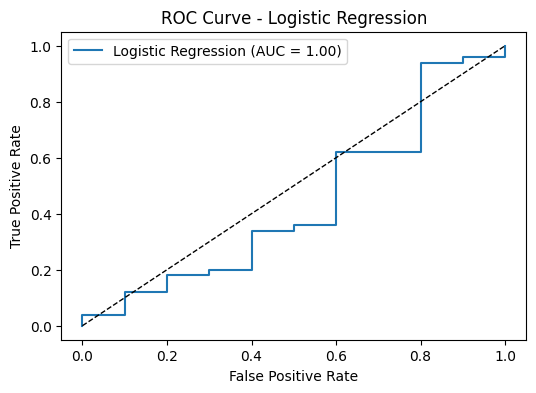

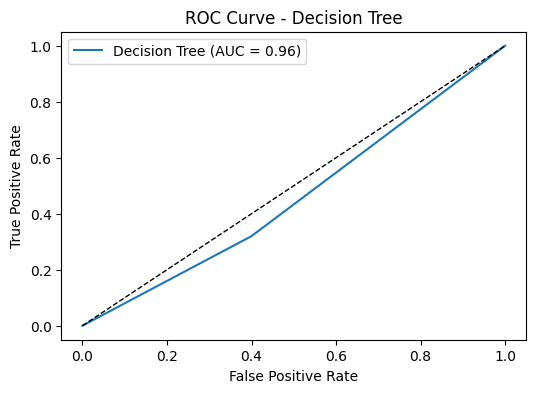

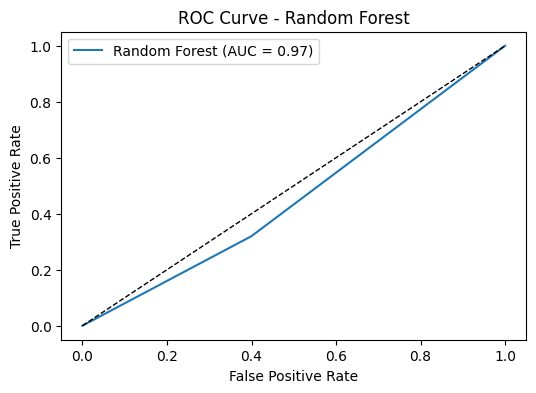

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:36:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


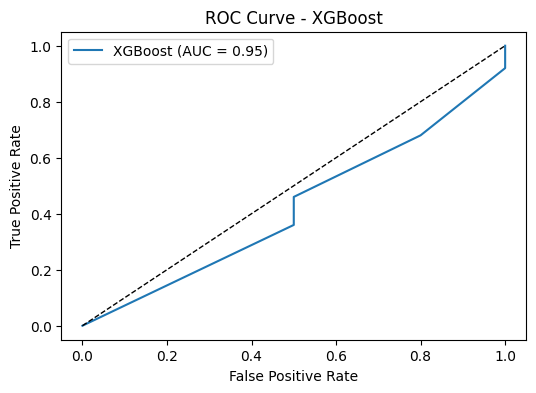


Optimized Model Performance Summary:

                 Model  Accuracy  Precision  Recall  F1-Score     AUC
0  Logistic Regression    0.9333     0.9360  0.9333    0.9332  0.9971
1        Decision Tree    0.9167     0.9224  0.9167    0.9162  0.9583
2        Random Forest    0.9500     0.9507  0.9500    0.9500  0.9733
3              XGBoost    0.8833     0.8854  0.8833    0.8818  0.9467


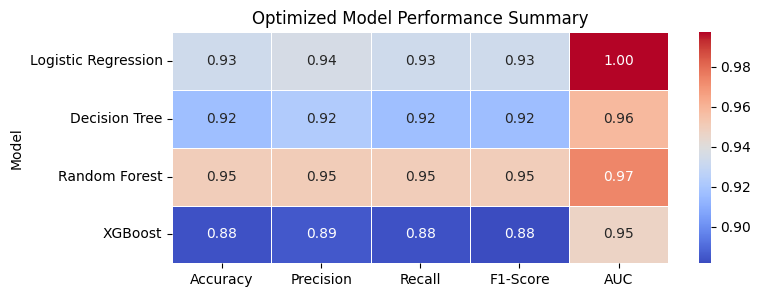

In [13]:
# Importar librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.metrics import (
    roc_curve, auc, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Cargar el dataset Iris
iris = load_iris()
X, y = iris.data, iris.target

# Binarizar etiquetas para la curva ROC (One-vs-Rest)
y_bin = label_binarize(y, classes=np.unique(y))

# Reducir el tamaño del dataset para acelerar la ejecución
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

# Normalizar características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Definir modelos con parámetros optimizados para ejecución rápida
models = {
    "Logistic Regression": LogisticRegression(max_iter=50, random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=2, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=2, max_depth=2, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=3, max_depth=2, use_label_encoder=False, eval_metric="mlogloss", random_state=42)
}

# Almacenar métricas de rendimiento
metrics_summary = []

# Entrenar y evaluar modelos individualmente
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)  # Obtener probabilidades

    # Calcular métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")
    auc_score = roc_auc_score(y_test, y_proba, multi_class="ovr")

    # Almacenar métricas en diccionario
    metrics_summary.append({
        "Model": model_name,
        "Accuracy": round(accuracy, 4),
        "Precision": round(precision, 4),
        "Recall": round(recall, 4),
        "F1-Score": round(f1, 4),
        "AUC": round(auc_score, 4)
    })

    # Graficar curva ROC (solo para la primera clase para evitar sobrecarga)
    fpr, tpr, _ = roc_curve(y_bin[:len(y_test), 0], y_proba[:, 0])
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc_score:.2f})")
    plt.plot([0, 1], [0, 1], 'k--', linewidth=1)  # Línea diagonal de referencia
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {model_name}")
    plt.legend()
    plt.show()

# Convertir métricas en DataFrame y mostrar
metrics_df = pd.DataFrame(metrics_summary)
print("\nOptimized Model Performance Summary:\n")
print(metrics_df)

# Visualizar métricas en heatmap
plt.figure(figsize=(8, 3))
sns.heatmap(metrics_df.set_index("Model"), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Optimized Model Performance Summary")
plt.show()


**Interpretación de los coeficientes de la Regresión Logística**


Coeficientes de la Regresión Logística y Odds Ratio:
                    Feature  Coefficient  Odds Ratio
5          mean compactness     0.652655    1.920633
15        compactness error     0.568702    1.765974
11            texture error     0.367761    1.444497
19  fractal dimension error     0.349557    1.418439
18           symmetry error     0.324894    1.383884
16          concavity error     0.163745    1.177914
9    mean fractal dimension     0.036185    1.036848
25        worst compactness     0.035920    1.036573
8             mean symmetry    -0.113813    0.892425
29  worst fractal dimension    -0.164264    0.848518
4           mean smoothness    -0.167243    0.845994
14         smoothness error    -0.185018    0.831089
12          perimeter error    -0.204988    0.814657
17     concave points error    -0.268200    0.764755
2            mean perimeter    -0.459783    0.631421
1              mean texture    -0.459795    0.631413
0               mean radius    -0.494999    0

<ipython-input-14-157ca57ac7fb>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coef_df["Odds Ratio"], y=coef_df["Feature"], palette="coolwarm")


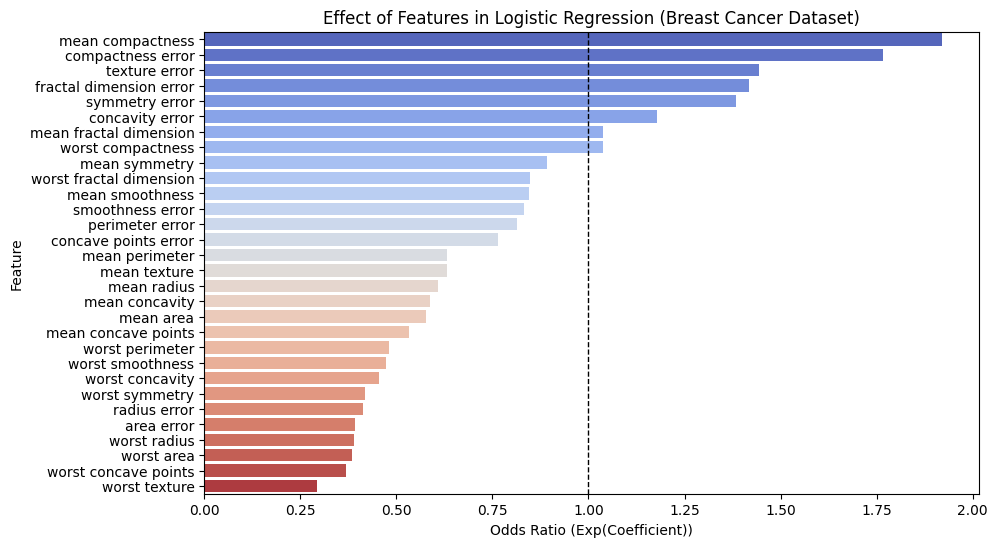

In [14]:
# Importar librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Cargar el dataset Breast Cancer
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target
feature_names = cancer.feature_names

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Estandarizar las características para mejorar la estabilidad numérica
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Entrenar modelo de Regresión Logística
model = LogisticRegression(max_iter=200, random_state=42)
model.fit(X_train, y_train)

# Obtener coeficientes y calcular Odds Ratio
coefficients = model.coef_[0]
odds_ratios = np.exp(coefficients)

# Crear un DataFrame para visualizar resultados
coef_df = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coefficients,
    "Odds Ratio": odds_ratios
})

# Ordenar por impacto en la clasificación
coef_df = coef_df.sort_values(by="Odds Ratio", ascending=False)

# Mostrar DataFrame con coeficientes y Odds Ratio
print("\nCoeficientes de la Regresión Logística y Odds Ratio:")
print(coef_df)

# Visualizar coeficientes con un gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=coef_df["Odds Ratio"], y=coef_df["Feature"], palette="coolwarm")
plt.axvline(x=1, color="black", linestyle="--", linewidth=1)  # Línea de referencia en OR=1
plt.xlabel("Odds Ratio (Exp(Coefficient))")
plt.ylabel("Feature")
plt.title("Effect of Features in Logistic Regression (Breast Cancer Dataset)")
plt.show()


- Si **OR > 1**, la característica **aumenta la probabilidad de que el tumor sea maligno**.
- Si **OR < 1**, la característica **reduce la probabilidad de que el tumor sea maligno**.
- Si **OR = 1**, la característica **no tiene impacto en la clasificación**.

**Ejemplo de interpretación**:
Si una característica tiene un **OR = 2.5**, significa que **por cada unidad que aumenta esa característica, la probabilidad de que el tumor sea maligno se multiplica por 2.5**.

Si una característica tiene un **OR = 0.5**, significa que **por cada unidad que aumenta esa característica, la probabilidad de que el tumor sea maligno se reduce a la mitad**.


Por ejemplo, si  el modelo nos dice que:
- **El radio del tumor tiene un OR = 4.2** → Tumores más grandes tienen más probabilidad de ser malignos.
- **La textura del tumor tiene un OR = 0.6** → Tumores con más textura tienen menos probabilidad de ser malignos.

Así podemos entender qué factores influyen en la clasificación.


**Probabilidad de cada observación de pertenecer a la clase positiva con regresión logística**



🔹 Probabilidades de tener cáncer según el modelo Random Forest:
   Subject  True Label  Predicted Probability of Cancer
0        1           0                             0.08
1        2           1                             1.00
2        3           1                             0.71
3        4           0                             0.00
4        5           0                             0.69
5        6           0                             0.01
6        7           1                             1.00
7        8           0                             0.03
8        9           1                             0.98
9       10           0                             0.02


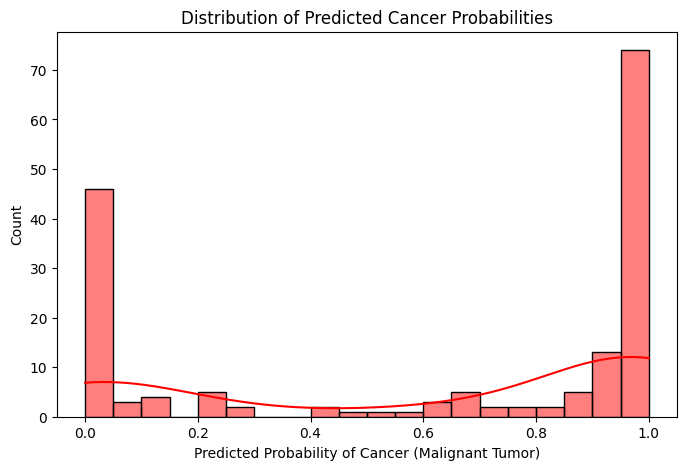

In [17]:
# Importar librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Cargar el dataset Breast Cancer
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Entrenar un modelo Random Forest sin GridSearch
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, max_features="sqrt", random_state=42)
rf_model.fit(X_train, y_train)

# Predecir la probabilidad de tener cáncer en los datos de prueba
y_proba = rf_model.predict_proba(X_test)[:, 1]  # Probabilidad de que sea maligno (clase 1)

# Crear un DataFrame con los resultados
results_df = pd.DataFrame({
    "Subject": range(1, len(y_test) + 1),
    "True Label": y_test,
    "Predicted Probability of Cancer": y_proba
})

# Mostrar los primeros sujetos con su probabilidad
print("\n🔹 Probabilidades de tener cáncer según el modelo Random Forest:")
print(results_df.head(10))

# Visualizar la distribución de las probabilidades
plt.figure(figsize=(8, 5))
sns.histplot(y_proba, bins=20, kde=True, color="red")
plt.xlabel("Predicted Probability of Cancer (Malignant Tumor)")
plt.ylabel("Count")
plt.title("Distribution of Predicted Cancer Probabilities")
plt.show()


Random Forest no permite calcular los Odds Ratio como en Regresión Logística porque estos modelos funcionan de manera completamente diferente.

### **Búsqueda de hiperparámetros**

In [16]:
# Importar librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Cargar el dataset Breast Cancer
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Definir los modelos y sus hiperparámetros para Grid Search
param_grid_tree = {
    "max_depth": [3, 5, 10],
    "min_samples_split": [2, 5, 10]
}

param_grid_forest = {
    "n_estimators": [10, 50, 100],
    "max_features": ["sqrt", "log2", None]
}

param_grid_svm = {
    "C": [0.1, 1, 10],
    "kernel": ["linear", "rbf"]
}

# Aplicar Grid Search con validación cruzada
grid_tree = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_tree, cv=5, scoring="accuracy")
grid_forest = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_forest, cv=5, scoring="accuracy")
grid_svm = GridSearchCV(SVC(random_state=42), param_grid_svm, cv=5, scoring="accuracy")

# Entrenar modelos optimizados
grid_tree.fit(X_train, y_train)
grid_forest.fit(X_train, y_train)
grid_svm.fit(X_train, y_train)

# Evaluar en datos de prueba
best_tree = grid_tree.best_estimator_
best_forest = grid_forest.best_estimator_
best_svm = grid_svm.best_estimator_

y_pred_tree = best_tree.predict(X_test)
y_pred_forest = best_forest.predict(X_test)
y_pred_svm = best_svm.predict(X_test)

# Almacenar los resultados de los mejores modelos
results_df = pd.DataFrame({
    "Model": ["Decision Tree", "Random Forest", "SVM"],
    "Best Params": [grid_tree.best_params_, grid_forest.best_params_, grid_svm.best_params_],
    "Test Accuracy": [accuracy_score(y_test, y_pred_tree), accuracy_score(y_test, y_pred_forest), accuracy_score(y_test, y_pred_svm)]
})

# Mostrar resultados
print("\n🔹 Grid Search Best Models and Accuracy:")
print(results_df)



🔹 Grid Search Best Models and Accuracy:
           Model                                    Best Params  Test Accuracy
0  Decision Tree       {'max_depth': 3, 'min_samples_split': 2}       0.923977
1  Random Forest  {'max_features': 'sqrt', 'n_estimators': 100}       0.935673
2            SVM                 {'C': 0.1, 'kernel': 'linear'}       0.947368
